# Setting

In [1]:
from pf_utils import BacktestManager, DataManager, MomentumPortfolio

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
metrics2 = [
    'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'

# KOSPI 200

In [3]:
days_in_year = 246

## Data

In [14]:
k200 = DataManager(
    file = 'kospi200_prices_240705.csv',
    #file = 'kospi200_prices_240707l.csv',
    universe = 'KOSPI200',
    path = path_data
)
k200.upload()

200 assets from 2021-01-04 to 2024-07-05 uploaded.
df_prices updated


In [6]:
#k200.download(start_date='2000', tickers=df_k200.columns)

In [7]:
#file = 'test_240707l.csv'
#k200.save(file=file)

## Backtest

In [7]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = days_in_year
)
bm = BacktestManager(k200.df_prices, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [9]:
name, ticker = 'KOSPI', '069500' 
df_kospi = bm.util_import_data(ticker, name=name)
bm.benchmark(df_kospi)

RunOnce selected


In [10]:
kwargs_build = dict(
    name = 'Momentum',
    freq = 'M', select = 'Momentum', weigh = 'ERC',
    n_assets=5, lookback=12, lag=12
)
bm.build(**kwargs_build)

In [11]:
kwargs_build = dict(
    name = 'K-ratio',
    freq = 'M', select = 'K-ratio', weigh = 'ERC',
    n_assets=5, lookback=12, lag=12
)
bm.build(**kwargs_build)

Backtesting 3 strategies: KOSPI, Momentum, K-ratio


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:57<00:00, 19.23s/it]

Returning stats


,KOSPI,Momentum,K-ratio
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,0.05969,4.957162,1.069294
cagr,0.016695,0.664683,0.230809
calmar,0.048753,2.400439,1.005693
max_drawdown,-0.342432,-0.276901,-0.229503
avg_drawdown,-0.08767,-0.05712,-0.044447
avg_drawdown_days,210.666667,17.465116,29.296296
daily_vol,0.17209,0.381467,0.226929
daily_sharpe,0.184019,1.552919,1.047034


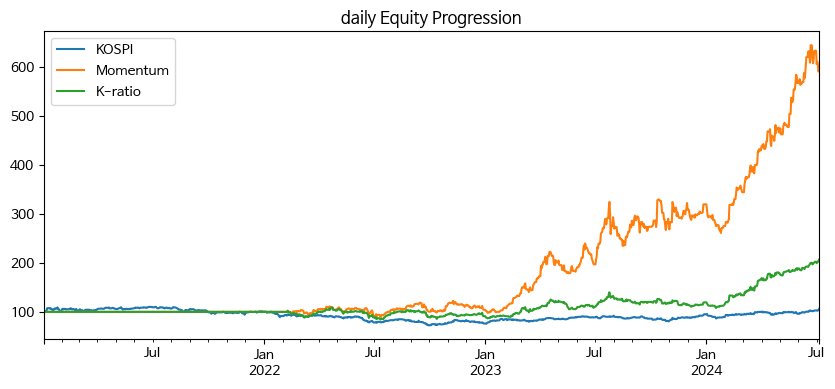

In [12]:
bm.run(figsize=(10,4))

# ETF

## Data

In [32]:
etf = DataManager(
    file = 'etfs_all_240705.csv',
    universe = 'ETF',
    path = path_data
)
etf.upload()

864 assets from 2021-01-04 to 2024-07-05 uploaded.
df_prices updated


In [33]:
choice = ['069500', '273130', '148070', '379800', '411060', '284430']
df_etfs = etf.df_prices[choice]
asset_names = etf.get_names(tickers=choice)
asset_names

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR
4) 411060: ACE KRX금현물
5) 284430: KODEX 200미국채혼합

## Backtest

In [35]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 245,
    asset_names = asset_names
)
bm = BacktestManager(df_etfs, **kwargs_bm)

period reset: 2021-12-15 ~ 2024-07-05
running self.util_check_days_in_year to check days in a year


In [36]:
bm.benchmark_ticker()

RunOnce selected


In [37]:
bm.build(
    name = 'COMB1: Eqaully',
    freq = 'Y', select = 'all', weigh = 'equally'
)

In [38]:
bm.build(
    name = 'COMB2: ERC',
    freq = 'Y', select = 'all', weigh = 'ERC', 
    lookback=12, lag=0
)

In [39]:
bm.build(    
    name = 'COMB3: InvVol',
    freq = 'Y', select = 'all', weigh = 'InvVol', 
    lookback=12, lag=0
)

Backtesting 4 strategies: KOSPI, COMB1: Eqaully, COMB2: ERC, COMB3: InvVol


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.22it/s]


Returning stats


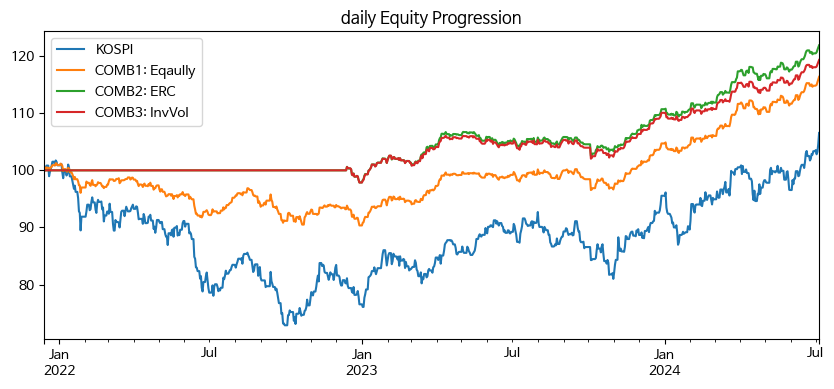

In [40]:
_ = bm.run(figsize=(10,4))

In [41]:
bm.get_stats(sort_by='monthly_sharpe', metrics=metrics2)

,COMB2: ERC,COMB3: InvVol,COMB1: Eqaully,KOSPI
start,2021-12-14,2021-12-14,2021-12-14,2021-12-14
end,2024-07-05,2024-07-05,2024-07-05,2024-07-05
cagr,0.080517,0.071554,0.061102,0.025121
monthly_vol,0.05538,0.054357,0.083106,0.207521
monthly_sharpe,1.414939,1.288041,0.7053,0.20433
max_drawdown,-0.039351,-0.03793,-0.107524,-0.283724
avg_drawdown,-0.007642,-0.007321,-0.01059,-0.066244
avg_drawdown_days,16.851852,18.6,41.142857,184.0


In [42]:
bm.portfolios

0) KOSPI
1) COMB1: Eqaully
2) COMB2: ERC
3) COMB3: InvVol

In [52]:
df = bm.get_security_weights(2).rename_axis(None)
df.columns = [f'{bm.asset_names[x]} ({x})' for x in df.columns]
df.T

COMB2: ERC: weights at transactions returned


,2022-12-13,2023-12-11
KODEX 200 (069500),0.086727,0.102417
KODEX 종합채권(AA-이상)액티브 (273130),0.304020,0.249632
KOSEF 국고채10년 (148070),0.169403,0.151821
KODEX 미국S&P500TR (379800),0.083484,0.145020
ACE KRX금현물 (411060),0.182266,0.166300
KODEX 200미국채혼합 (284430),0.167560,0.165475


# Balance

In [7]:
k200 = MomentumPortfolio(df_k200, days_in_year)

15 assets removed for shorter periods (7.5%)


In [10]:
k200.select('2024-06-01')
k200.weigh()
h = k200.balance()

In [13]:
k200.select()
k200.weigh()
k200.balance(h.balance)

,price,transaction,balance
001570,"82,800",0,17
002710,"53,500",-3,30
042700,"160,200",0,12
138040,"83,400",-3,32
267260,"311,000",-1,6
